In [1]:
import mlrose_hiive as mlrose

# import mlrose
import numpy as np

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score 
from sklearn.preprocessing import OrdinalEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import svm
from sklearn.neural_network import MLPClassifier
# from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import plot_roc_curve

from pandas import DataFrame


import matplotlib.pyplot as plt

from sklearn.metrics import auc
from sklearn.metrics import RocCurveDisplay
from sklearn.model_selection import StratifiedKFold

from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.datasets import load_digits
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import datasets


In [55]:
digits = datasets.load_digits()

# flatten the images
# n_samples = len(digits.images)
# data = digits.images.reshape((n_samples, -1))


# Split data into 50% train and 50% test subsets
xTrain, xTest, yTrain, yTest = train_test_split(
    digits.data, digits.target, test_size=0.5, shuffle=False
)

In [56]:
one_hot = OneHotEncoder()

yTrain = one_hot.fit_transform(yTrain.reshape(-1, 1)).todense()
yTest = one_hot.transform(yTest.reshape(-1, 1)).todense()
yTrain.shape

scaler = MinMaxScaler()

xTrain = scaler.fit_transform(xTrain)
xTest = scaler.transform(xTest)

In [57]:
mlp_clf = MLPClassifier(hidden_layer_sizes=(20,28, 20),  max_iter=500, solver='adam', activation='relu', alpha=0.7, 
                 learning_rate_init=0.01, learning_rate='adaptive',  verbose=False, momentum=0.1, random_state=0)
mlp_clf.fit(xTrain, yTrain)
fitness_curve1 = mlp_clf.loss_curve_
mlp_clf.score(xTest,yTest)


0.8565072302558399

In [59]:
# Initialize neural network object and fit object - attempt 1
nn_model1 = mlrose.NeuralNetwork(hidden_nodes = [20, 28, 20], activation ='relu', 
                                 algorithm ='gradient_descent', curve = True,
                                 max_iters = 500, bias = True, is_classifier = True, 
                                 learning_rate = 0.01, early_stopping = True, 
                                 clip_max = 5, max_attempts = 100, random_state = 3)

nn_model1.fit(xTrain, yTrain)

y_train_pred = nn_model1.predict(xTrain)

y_train_accuracy = accuracy_score(yTrain, y_train_pred)

print(y_train_accuracy)

y_test_pred = nn_model1.predict(xTest)

y_test_accuracy = accuracy_score(yTest, y_test_pred)

print(y_test_accuracy)

fitness_curve1 = nn_model1.fitness_curve

# print(type(fitness_curve1))
# fitness_curve1a = fitness_curve1[:, 0]
# fitness_curve1b = fitness_curve1[:, 1]
# plt.plot(range(len(fitness_curve1)), fitness_curve1a)

0.10022271714922049
0.09788654060066741


In [48]:
a = np.argmax(y_train_pred, axis=1)
b = np.argmax(yTrain, axis=1)
print(y_train_pred[:10])
print(yTrain[:10])
print(y_train_pred.shape)
print(yTrain.shape)

accuracy_score(a, b)

[[1 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0]]
[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]
(898, 10)
(898, 10)


0.10022271714922049

In [32]:
nn_model2 = mlrose.NeuralNetwork(hidden_nodes = [20, 28, 20], activation ='relu', 
                                 algorithm ='random_hill_climb', curve = True,
                                 max_iters = 1000, bias = True, is_classifier = True, 
                                 learning_rate = 0.001, early_stopping = True, restarts = 0,
                                 clip_max = 5, max_attempts = 100, random_state = 1)

nn_model2.fit(xTrain, yTrain)

y_train_pred = nn_model2.predict(xTrain)

y_train_accuracy = accuracy_score(yTrain, y_train_pred)

print(y_train_accuracy)

y_test_pred = nn_model2.predict(xTest)

y_test_accuracy = accuracy_score(yTest, y_test_pred)

print(y_test_accuracy)

# fitness_curve2 = nn_model2.fitness_curve
# fitness_curve2a = fitness_curve2[:, 0]
# fitness_curve2b = fitness_curve2[:, 1]
# plt.plot(range(len(fitness_curve2)), fitness_curve2a)

0.08240534521158129
0.08565072302558398


In [34]:
nn_model3 = mlrose.NeuralNetwork(hidden_nodes = [20, 28, 20], activation ='relu', 
                                 algorithm ='simulated_annealing', curve = True,
                                 max_iters = 1000, bias = True, is_classifier = True, 
                                 learning_rate = 0.001, early_stopping = True, restarts = 0,
                                 clip_max = 5, max_attempts = 100, random_state = 1)

nn_model3.fit(xTrain, yTrain)

y_train_pred = nn_model3.predict(xTrain)

y_train_accuracy = accuracy_score(yTrain, y_train_pred)

print(y_train_accuracy)

y_test_pred = nn_model3.predict(xTest)

y_test_accuracy = accuracy_score(yTest, y_test_pred)

print(y_test_accuracy)

fitness_curve3 = nn_model3.fitness_curve
fitness_curve3a = fitness_curve3[:, 0]
fitness_curve3b = fitness_curve3[:, 1]
# plt.plot(range(len(fitness_curve3)), fitness_curve3a)

0.08129175946547884
0.08565072302558398


In [35]:
nn_model4 = mlrose.NeuralNetwork(hidden_nodes = [20, 28, 20], activation ='relu', 
                                 algorithm ='genetic_alg', curve = True,
                                 max_iters = 1000, bias = True, is_classifier = True, 
                                 learning_rate = 0.001, early_stopping = True, restarts = 0,
                                 clip_max = 5, max_attempts = 100, random_state = 1)

nn_model4.fit(xTrain, yTrain)

y_train_pred = nn_model4.predict(xTrain)

y_train_accuracy = accuracy_score(yTrain, y_train_pred)

print(y_train_accuracy)

y_test_pred = nn_model4.predict(xTest)

y_test_accuracy = accuracy_score(yTest, y_test_pred)

print(y_test_accuracy)

fitness_curve4 = nn_model4.fitness_curve
fitness_curve4a = fitness_curve4[:, 0]
fitness_curve4b = fitness_curve4[:, 1]
# plt.plot(range(len(fitness_curve4)), fitness_curve4a)

KeyboardInterrupt: 

In [ ]:
plt.plot(range(len(fitness_curve1)), -fitness_curve1[:], label='gradient_descent')
plt.plot(range(len(fitness_curve2)), fitness_curve2a, label='random_hill_climb')
plt.plot(range(len(fitness_curve3)), fitness_curve3a, label='simulated_annealing')
plt.plot(range(len(fitness_curve4)), fitness_curve4a, label='genetic_alg')
# plt.xlim([0, 100])
# plt.ylim([0, 10])


In [ ]:
# plt.plot(range(len(fitness_curve1)), fitness_curve1, label='gradient_descent')
plt.plot(range(len(fitness_curve2)), fitness_curve2b, label='random_hill_climb')
plt.plot(range(len(fitness_curve3)), fitness_curve3b, label='simulated_annealing')
plt.plot(range(len(fitness_curve4)), fitness_curve4b, label='genetic_alg')

In [ ]:
fitness_curve1[:10]

In [66]:
data = datasets.load_digits()
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size = 0.2, 
                                                    random_state = 3)
scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
one_hot = OneHotEncoder()

y_train_hot = one_hot.fit_transform(y_train.reshape(-1, 1)).todense()
y_test_hot = one_hot.transform(y_test.reshape(-1, 1)).todense()

nn_model1 = mlrose.NeuralNetwork(hidden_nodes = [20, 28, 20], activation ='relu', 
                                 algorithm ='gradient_descent', curve = True,
                                 max_iters = 1000, bias = True, is_classifier = True, 
                                 learning_rate = 0.0001, early_stopping = True, 
                                 clip_max = 5, max_attempts = 100, random_state = 3)

nn_model1.fit(X_train_scaled, y_train_hot)
y_train_pred = nn_model1.predict(X_train_scaled)

y_train_accuracy = accuracy_score(y_train_hot, y_train_pred)

print(y_train_accuracy)

y_test_pred = nn_model1.predict(X_test_scaled)

y_test_accuracy = accuracy_score(y_test_hot, y_test_pred)

print(y_test_accuracy)

fitness_curve1 = nn_model1.fitness_curve
# fitness_curve1a = fitness_curve1[:, 0]
# fitness_curve1b = fitness_curve1[:, 1]

0.9958246346555324
0.9444444444444444


In [72]:
mlp_clf = MLPClassifier(hidden_layer_sizes=(20,28, 20),  max_iter=500, solver='sgd', activation='relu', alpha=0.7, 
                 learning_rate_init=0.1, learning_rate='adaptive',  verbose=False, momentum=0.1, random_state=0)
mlp_clf.fit(X_train_scaled, y_train_hot)
fitness_curve1 = mlp_clf.loss_curve_
print(mlp_clf.score(X_train_scaled,y_train_hot))
print(mlp_clf.score(X_test_scaled,y_test_hot))


0.9867780097425192
0.9361111111111111


In [86]:
nn_model2 = mlrose.NeuralNetwork(hidden_nodes = [20, 28, 20], activation ='relu', 
                                 algorithm ='random_hill_climb', curve = True,
                                 max_iters = 1000, bias = True, is_classifier = True, 
                                 learning_rate = 0.01, early_stopping = True, 
                                 clip_max = 5, max_attempts = 1000, random_state = 3)

nn_model2.fit(X_train_scaled, y_train_hot)
y_train_pred = nn_model2.predict(X_train_scaled)

y_train_accuracy = accuracy_score(y_train_hot, y_train_pred)

print(y_train_accuracy)

y_test_pred = nn_model2.predict(X_test_scaled)

y_test_accuracy = accuracy_score(y_test_hot, y_test_pred)

print(y_test_accuracy)

fitness_curve2 = nn_model2.fitness_curve
fitness_curve2a = fitness_curve2[:, 0]
fitness_curve2b = fitness_curve2[:, 1]

0.08072372999304106
0.06944444444444445


In [85]:
nn_model3 = mlrose.NeuralNetwork(hidden_nodes = [20, 28, 20], activation ='relu', 
                                 algorithm ='simulated_annealing', curve = True,
                                 max_iters = 1000, bias = True, is_classifier = True, 
                                 learning_rate = 0.0001, early_stopping = True, 
                                 clip_max = 5, max_attempts = 1000, random_state = 3)

nn_model3.fit(X_train_scaled, y_train_hot)
y_train_pred = nn_model3.predict(X_train_scaled)

y_train_accuracy = accuracy_score(y_train_hot, y_train_pred)

print(y_train_accuracy)

y_test_pred = nn_model3.predict(X_test_scaled)

y_test_accuracy = accuracy_score(y_test_hot, y_test_pred)

print(y_test_accuracy)

fitness_curve3 = nn_model3.fitness_curve
fitness_curve3a = fitness_curve3[:, 0]
fitness_curve3b = fitness_curve3[:, 1]

0.0779401530967293
0.06944444444444445


In [79]:
nn_model4 = mlrose.NeuralNetwork(hidden_nodes = [20, 28, 20], activation ='relu', 
                                 algorithm ='genetic_alg', curve = True,
                                 max_iters = 1000, bias = True, is_classifier = True, 
                                 learning_rate = 0.001, early_stopping = True, restarts = 0,
                                 clip_max = 5, max_attempts = 100, random_state = 1)

nn_model4.fit(X_train_scaled, y_train_hot)

y_train_pred = nn_model4.predict(X_train_scaled)

y_train_accuracy = accuracy_score(y_train_hot, y_train_pred)

print(y_train_accuracy)

y_test_pred = nn_model4.predict(X_test_scaled)

y_test_accuracy = accuracy_score(y_test_hot, y_test_pred)

print(y_test_accuracy)

fitness_curve4 = nn_model4.fitness_curve
fitness_curve4a = fitness_curve4[:, 0]
fitness_curve4b = fitness_curve4[:, 1]
# plt.plot(range(len(fitness_curve4)), fitness_curve4a)

0.2874043145441893
0.28888888888888886


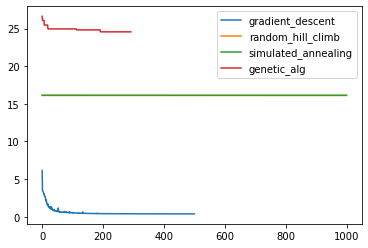

In [84]:
plt.plot(range(len(fitness_curve1)), fitness_curve1, label='gradient_descent')
plt.plot(range(len(fitness_curve2)), fitness_curve2a, label='random_hill_climb')
plt.plot(range(len(fitness_curve3)), fitness_curve3a, label='simulated_annealing')
plt.plot(range(len(fitness_curve4)), fitness_curve4a, label='genetic_alg')
plt.legend()
# plt.xlim([0, 100])
# plt.ylim([0, 10])